In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install plotly
# !pip install seaborn
# !pip install google

In [41]:
import pandas as pd
import plotly.express as ex
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [75]:
def load_dataset():
  df = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')
  return df
df =  load_dataset()

def load_dataset_2():
  return pd.read_csv("/content/drive/MyDrive/googleplaystore_user_reviews.csv")
df2=load_dataset_2()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [76]:
def clean_dataset(dataset):
  df.Installs = df.Installs.str.replace('+','')
  df.Installs = df.Installs.str.replace(',','')
  return df
df = clean_dataset(df)
df.drop(10472, axis = 0, inplace = True)
df.Installs.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [77]:
line = df[df.Installs == 'Free']
# df.drop(10472, axis = 0, inplace = True)
df.Installs = df.Installs.astype(int)
df.Reviews = df.Reviews.astype(int)

In [78]:
df_m = df[df.Size.str.contains('k', regex=False)]
df_m.Size = df_m.Size.str.replace('k','').astype(float)
df_m.Size = df_m.Size/1000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df.Size.update(df_m.Size)

In [80]:
df.Size = df.Size.str.replace('M','')

In [81]:
df.Size = df.Size.replace('Varies with device', np.nan)
df.Size = df.Size.astype(float)

In [82]:
cat_means = df.groupby('Category').mean()

In [83]:
df['Size'] = df.groupby('Category')['Size'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [84]:
df.Price = df.Price.str.replace('$','')
df.Price = df.Price.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



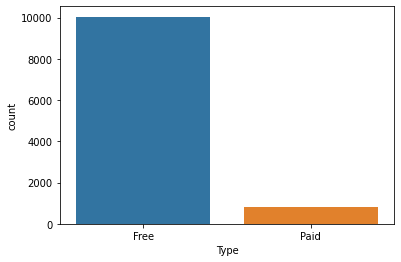

In [85]:
sns.countplot(data = df, x = 'Type')

In [86]:
ex.pie(df.groupby('Type').count(), values = 'App', names = ['Free', 'Paid'])

In [87]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

In [89]:
paid_apps = df[df.Type == 'Paid']
free_apps = df[df.Type == 'Free']
total_price = paid_apps.Price * paid_apps.Installs
paid_apps['total_price'] = total_price
df = px.data.gapminder().query("continent == 'Asia'")
fig = px.pie(paid_apps, values='total_price', names='Category',hole=.5)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

AttributeError: ignored

In [ ]:
paid_apps = df[df.Type == 'Paid']
free_apps = df[df.Type == 'Free']
total_price = paid_apps.Price * paid_apps.Installs
paid_apps['total_price'] = total_price
ex.pie(paid_apps, values = 'total_price', names = 'Category')


In [ ]:
market_capitalization = paid_apps.groupby('Category').sum().total_price.sort_values()
ex.bar(x= market_capitalization.values[10:], y = market_capitalization.index[10:])

In [ ]:
market_capitalization.sum()

In [19]:
most_downloads_category = df.groupby('Category').Installs.sum().sort_values(ascending = False)
ex.bar(y = most_downloads_category.values, x = most_downloads_category.index)

KeyError: ignored

In [ ]:
expensive_apps = df.groupby('Category').Price.max().sort_values(ascending = True)
ex.bar(x = expensive_apps.values[7:], y = expensive_apps.index[7:])

In [20]:
paid_apps[paid_apps.Category == 'FAMILY'].sort_values(by = ['Price'], ascending = False)[0:20][['App','Price','Installs']]

NameError: ignored

In [ ]:
top_20_free_apps = free_apps.sort_values(by = ['Installs'], ascending = False)[['App','Price','Installs']][0:20]
top_20_free_apps.Installs = (df['Installs'].astype(float)/1000000000).astype(str) + ' Bilion+'
top_20_free_apps

In [34]:
ex.box(paid_apps.Size, labels={ 'y':'MBytes'})

NameError: ignored

In [33]:
downloads = df.groupby('Type').sum()
downloads

KeyError: ignored

In [ ]:
(69225881/146562688646) * 100

In [ ]:
ex.pie(downloads, values = 'Installs')

In [23]:
top_familiy_apps = paid_apps[paid_apps.Category == 'FAMILY'].sort_values(by = ['Price'], ascending = False)

NameError: ignored

In [24]:
top_familiy_apps = paid_apps[paid_apps.Category == 'FAMILY'].sort_values(by = ['total_price'], ascending = False)

NameError: ignored

In [ ]:
top_familiy_genres = pd.unique(top_familiy_apps[0:50].Genres)

In [ ]:
text = ''
for each in top_familiy_genres:
    text += each

In [32]:
data = list(set(re.split(' |&|;|(?=[A-Z])', text)))

NameError: ignored

In [ ]:
text

In [26]:
all_installs = 69225881 + 146562688646

In [27]:
df_family = df[df.Category == 'FAMILY']
all_installs = df_family.Installs.sum()

AttributeError: ignored

In [28]:
df_family.Installs = df_family.Installs/all_installs*100

NameError: ignored

In [ ]:
df_family.sort_values(by = ['Installs'], ascending = False)[0:50].drop_duplicates(inplace = True)

In [29]:
df_family.sort_values(by = ['Installs'], ascending = False)[0:20][['App','Installs']].drop(4527)

NameError: ignored

In [ ]:
corr_df = df[['Rating','Reviews','Size','Installs','Price']]
plt.figure(figsize =(8,8))
matrix = np.triu(corr_df.corr())
sns.heatmap(corr_df.corr(), cmap="icefire", mask=matrix, linecolor='black', annot=True)

In [30]:
ex.scatter(df, x = np.log(df.Installs), y = np.log(df.Reviews), labels={'x':'Installs','y':'Reviews'})

AttributeError: ignored

In [ ]:
niche = df.groupby('Category')['Content Rating'].value_counts()
niche = pd.DataFrame(niche).rename(columns={'Content Rating':'Count'}).reset_index()
plt.figure(figsize=(30,11))
sns.barplot(x="Category", y="Count", hue="Content Rating", data=niche)
plt.xticks(rotation=45)

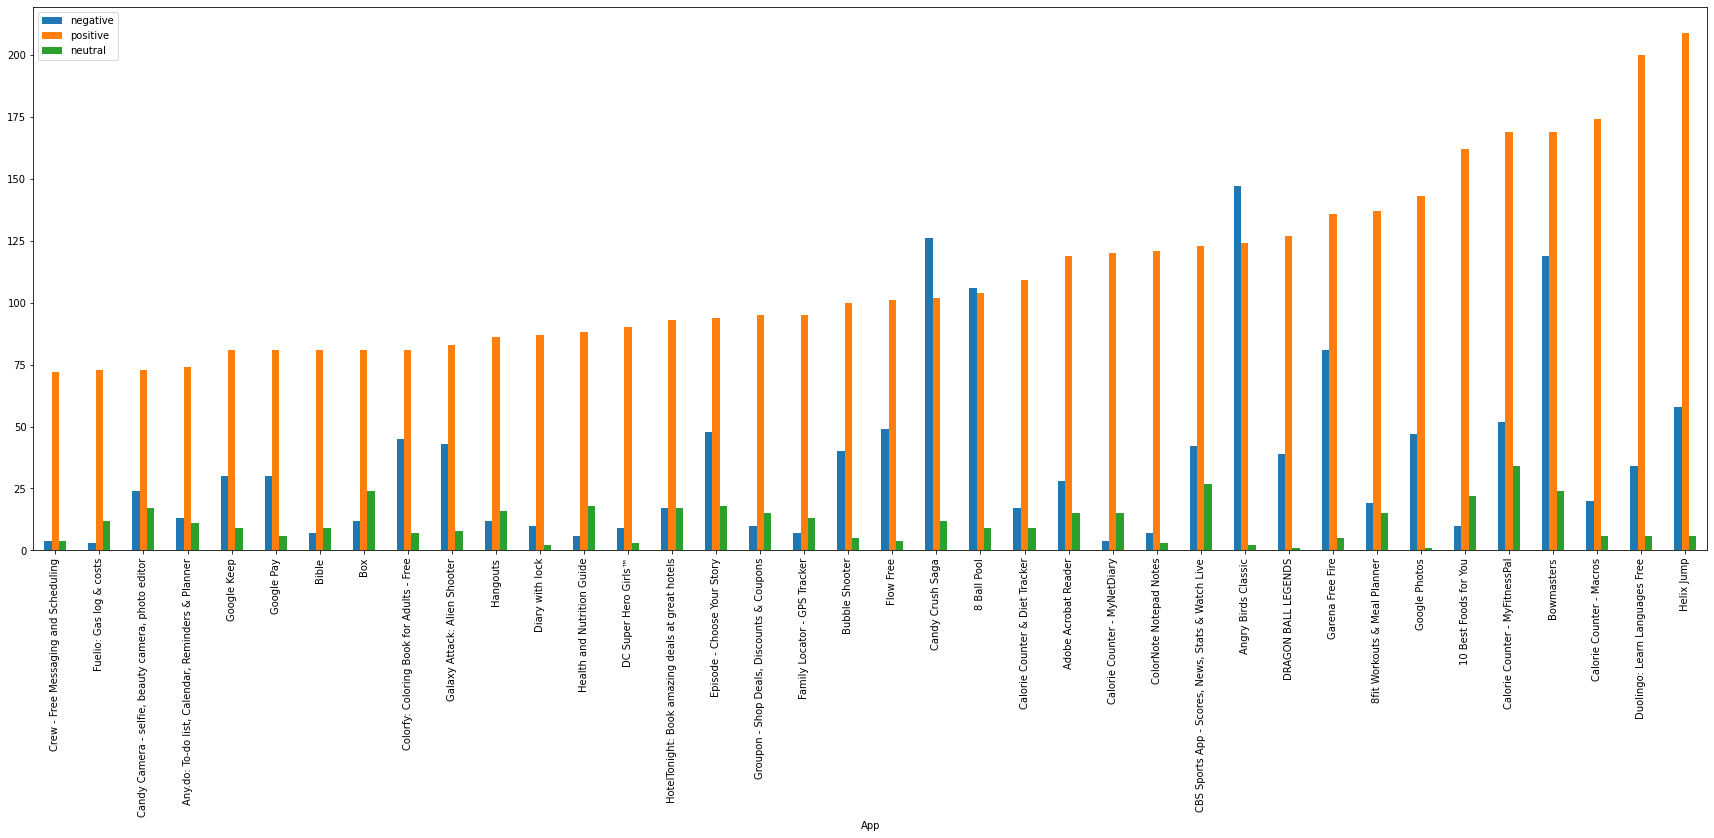

In [31]:
pos = df2.query(f'Sentiment == "Positive"').App.value_counts()
neg = df2.query(f'Sentiment == "Negative"').App.value_counts()
net = df2.query(f'Sentiment == "Neutral"').App.value_counts()
negative = pd.DataFrame(neg).rename(columns={"App": "negative"})
positive = pd.DataFrame(pos).rename(columns={"App": "positive"})
netural = pd.DataFrame(net).rename(columns={"App": "neutral"})
statistic = pd.concat([negative, positive,netural], axis=1)
apps = statistic.reset_index()

apps = apps.rename(columns={"index": "App"}).dropna()
apps = apps[apps.positive > 70.0]
apps = apps.sort_values(by=['positive'])

apps.plot(x='App', kind='bar',figsize=(30,10))